[INFO] Loading Stable Diffusion model...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

[INFO] Model loaded.

[INFO] Generating image for prompt: 'batman on building'


  0%|          | 0/50 [00:00<?, ?it/s]

[INFO] Image generation complete.


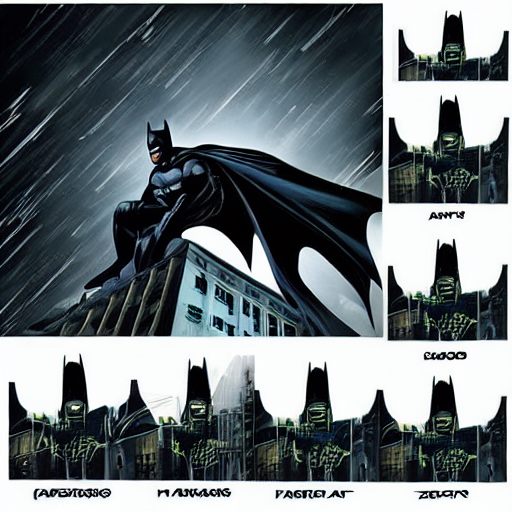

Saved to generated_images/generated_20250717_130954.png

[INFO] Generating image for prompt: 'batman punching superman'


  0%|          | 0/50 [00:00<?, ?it/s]

[INFO] Image generation complete.


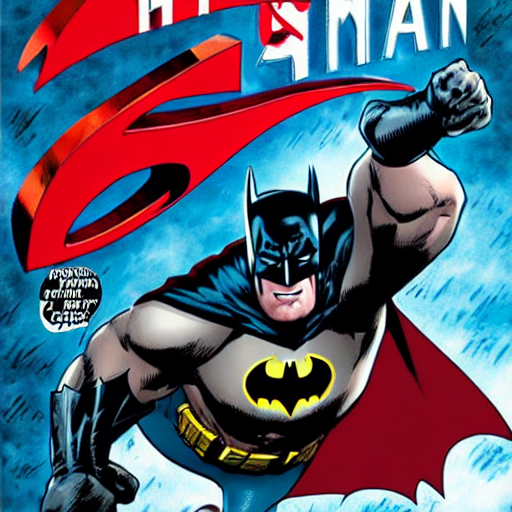

Saved to generated_images/generated_20250717_133349.png

Enter your prompt (or type 'exit' to quit): exit

Exiting program.


In [2]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import datetime
import os

# Load the Stable Diffusion model (only needs to be done once)
print("[INFO] Loading Stable Diffusion model...")
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float32
)
pipe = pipe.to("cpu") # You can change "cpu" to "cuda" if you have a GPU
print("[INFO] Model loaded.")

# Create directory for saving images if it doesn't exist
os.makedirs("generated_images", exist_ok=True)

while True:
    prompt = input("\nEnter your prompt (or type 'exit' to quit): ")
    if prompt.lower() == 'exit':
        break

    print(f"\n[INFO] Generating image for prompt: '{prompt}'")
    result = pipe(prompt)
    image = result.images[0]

    print("[INFO] Image generation complete.")

    # Display the image
    image.show()
    display(image)


    # Save the image
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    image_path = f"generated_images/generated_{timestamp}.png"
    image.save(image_path)
    print(f"Saved to {image_path}")

print("\nExiting program.")